Recap:
In this activity, Maximum Likelihood is used to estimate the parameters of a linear regression model, by converting the regression model to a conditional probability problem. MLE uses a likelihood function to compute the probability of observing data under the model parameters (see lec6 slides). 

Likelihood function : $𝐿(𝜃|𝑋)$, where $𝜃$ represents the parameters of the likelihood function including the weights of the linear regression (prediction) model and the residual error variance:

$𝐿(𝜃|𝑋)= \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - g(x_i))^2}{2\sigma^2} \right) \right] $
 

To compute Negative of the Log of Likelihood (NLL), given that $\log(a.b) = \log a + \log b$:

$-\log𝐿(𝜃|𝑋)= -\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right]$

Let's now say we change the weights of our model multiple times, and each time we change the weights, a new NLL is obtained given the weights of the model. To find the optimal weights that corresponds to the minimum NLL, we take the gradient of the NLL function wrt the parameters of the model and set to 0:

$\frac{\partial \mathcal({-logL}(\theta | X))}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 
   \frac{\partial \mathcal ( 0.5\sum_{i=1}^{n} [\log (2\pi\sigma^2) + \frac{{(y_i - wx_i)^2}}{{\sigma^2}}] )} {\partial \theta} = 0$

Lab2: This lab activity has 2 parts. 
- Part1) In this part you are asked to use the generated synthetic data in Step 1 (consider this as the training dataset), and manually calculate the NLL values corresponding to the provided weights in Step 2 and 3. Report the best model based on the computed NLL both in the given code and in your computation and see if they match (match between your work and the result of the provided code in this lab). You can use a calculator in your computations. 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


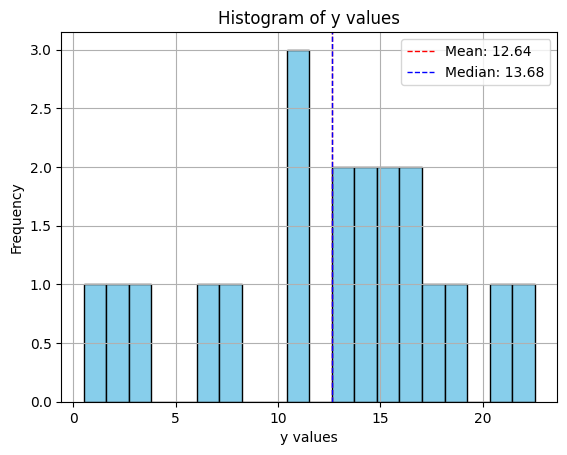

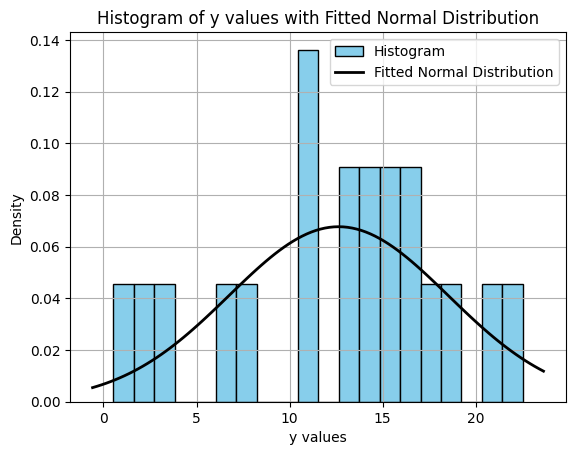

In [1]:
#Step 1: Generating Synthetic Data and visualizing the probability distribution of data

%pip install numpy
%pip install matplotlib
%pip install scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Generating Synthetic Data
np.random.seed(0)  # Set seed for reproducibility
num_samples = 20
X = np.random.uniform(0, 10, num_samples)  # Generate random X values
true_slope = 2
true_intercept = 1
noise = np.random.normal(0, 1, num_samples)  # Add random noise
y = true_slope * X + true_intercept + noise  # Generate y values with linear relationship


# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
# Calculate and plot the mean of y
mean_y = np.mean(y)
median_y = np.median(y)
plt.axvline(mean_y, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_y:.2f}')
plt.axvline(mean_y, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()



# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')
plt.xlabel('y values')
plt.ylabel('Density')
plt.title('Histogram of y values with Fitted Normal Distribution')

# Fit a normal distribution to the data
mu, std_dev = norm.fit(y)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.legend()
plt.grid(True)
plt.show()



In [3]:
#Step 2: Implementing Negative Log-Likelihood Function

import numpy as np

def negative_log_likelihood(X, y, weights):
    """
    Compute the negative log-likelihood of the data given the weights of the linear regression model.

    Parameters:
        X (ndarray): Independent variable (features) matrix with shape (num_samples, num_features).
        y (ndarray): Dependent variable (response) vector with shape (num_samples,).
        weights (ndarray): Coefficients (including intercept) of the linear regression model.

    Returns:
        float: Negative log-likelihood value.
    """
    # Calculate predicted y values
    # performs the linear combination of weights and input attributes X to obtain the predictions
    # This is performed on training data
    y_pred = np.dot(X, weights)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate negative log-likelihood (assuming normally distributed errors)
    nll = 0.5 * np.sum(np.log(2 * np.pi * np.var(residuals)) + (residuals ** 2) / np.var(residuals))
    
    return nll


In [4]:
# Step 3: Obtaining the model with the minimum log likelihood


# Add bias term (column of 1 values (x0)) to X 
X_with_bias = np.column_stack((np.ones_like(X), X))
# Initialize weights randomly
initial_weights = np.random.randn(X_with_bias.shape[1])

print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, initial_weights),initial_weights ))

# Define the number of times to change the weights
num_changes = 5

for i in range(num_changes):
    # Generate new random weights
    new_weights = np.random.randn(X_with_bias.shape[1])
    # Compute the negative log-likelihood for the new weights
    print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, new_weights),new_weights))


nll:74.75312929867806, weights:[1.23029068 1.20237985]
nll:114.97203067780396, weights:[-0.38732682 -0.30230275]
nll:124.46764280295727, weights:[-1.04855297 -1.42001794]
nll:92.45598141834326, weights:[-1.70627019  1.9507754 ]
nll:116.65810243680329, weights:[-0.50965218 -0.4380743 ]
nll:115.55464454689576, weights:[-1.25279536  0.77749036]


In [12]:
def manual_nll(X, y, weights):

    y_pred = np.dot(X, weights)
    residual = y - y_pred
    n = len(y)
    mean = np.sum(residual)/n
    var = np.sum((residual - mean)**2)/n
    L_Xi = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-(residual**2) / (2 * var))
    LL = np.log(L_Xi)

  
    return -np.sum(LL)

def check_matching_digits(given_return, manual_return, num_digits):
    given_str = "{:.{prec}f}".format(given_return, prec=num_digits)
    manual_str = "{:.{prec}f}".format(manual_return, prec=num_digits)
    if given_str == manual_str:
        print("Results Match\n")
    else:
        print("Results Do Not Match")

for i in range(6):
    random_weights = np.random.randn(X_with_bias.shape[1])
    print("Randomized weights: ", random_weights)
    given_return = negative_log_likelihood(X_with_bias, y, random_weights)
    manual_return = manual_nll(X_with_bias, y, random_weights)
    print("Given function nll: {}".format(given_return))
    print("Manual function nll: {}\n".format(manual_return))

    num_digits_to_check = 6
    given_return = negative_log_likelihood(X_with_bias, y, new_weights)
    manual_return = manual_nll(X_with_bias, y, new_weights)
    check_matching_digits(given_return, manual_return, num_digits_to_check)

Randomized weights:  [-0.67433266  0.03183056]
Given function nll: 114.68037259152207
Manual function nll: 114.68037259152207

Results Match

Randomized weights:  [-0.63584608  0.67643329]
Given function nll: 108.93845435801336
Manual function nll: 108.93845435801336

Results Match

Randomized weights:  [ 0.57659082 -0.20829876]
Given function nll: 107.94155792061133
Manual function nll: 107.94155792061132

Results Match

Randomized weights:  [ 0.39600671 -1.09306151]
Given function nll: 116.008052085685
Manual function nll: 116.008052085685

Results Match

Randomized weights:  [-1.49125759  0.4393917 ]
Given function nll: 119.77495383457861
Manual function nll: 119.77495383457861

Results Match

Randomized weights:  [0.1666735  0.63503144]
Given function nll: 100.95501097465575
Manual function nll: 100.95501097465575

Results Match



-Part 2: The following code is provided to you to understand how full-batch-gradient-descent and stochastic-gradient-descent is implementes to optimize the training of a regression model, using california housing dataset. Study the code by going through the implementation and provide a high-level algorithm corresponding to the solution given below. Make sure that your algorithm is conceptually aligned with the topics discussed in the lecture. Next, explain the trend visualized by the code and describe the implications of the plot. Create a new "Code" cell below the results, and copy and paste the provided code. Then manipluate the code to provide a visualized comparison between SGD, BGD, and Mini-BGD using different batch sizes 2, 5, 7, 10 for 20 epochs. Report your analysis. 

dataset size:20640
BGD MSE: 13.55315424222496
SGD MSE: 31.229438498057473


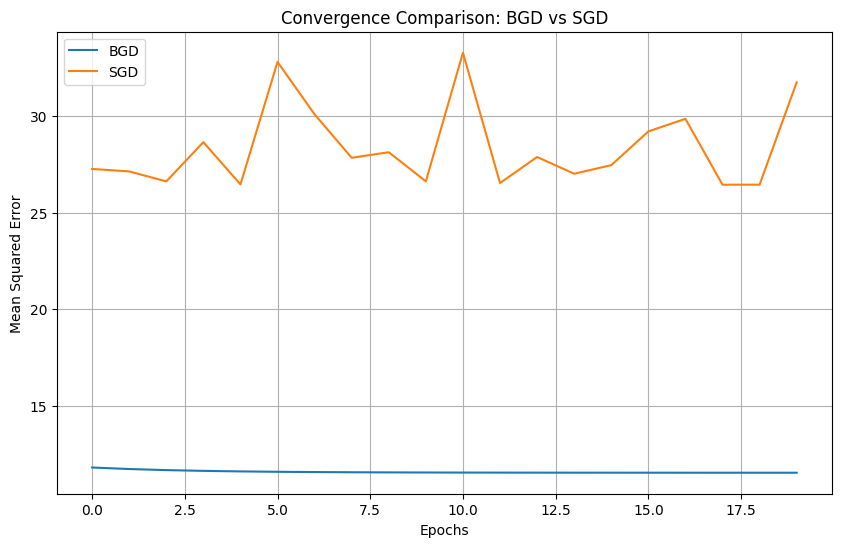

In [20]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error) 
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history

# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD')
plt.plot(sgd_loss_history, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.grid(True)
plt.show()


Algorithm:

Define a function named fit that takes arguments X, y, lr, epochs, and batch_size:
    Initialize an empty list called loss_history
    Create a new linear model named model using stochastic gradient descent (SGD) with X.shape[1] parameters
    Loop from i = 1 to epochs:
        Fit the model for one iteration using X, y, and batch_size; store the loss in a variable called loss
        Append the loss to the loss_history list
    Return the loss_history list

Call the fit function with arguments X, y to train the model using Batch Gradient Descent (BGD) for the full batch; store the loss history in bgd_loss

Call the fit function with arguments X, y and batch_size=1 to train the model using Stochastic Gradient Descent (SGD) for a batch size of 1; store the loss history in sgd_loss

Plot the loss history of the BGD model (bgd_loss) with label 'BGD'
Plot the loss history of the SGD model (sgd_loss) with label 'SGD'


The graph shows that both the gradient descent techniques have the opposite learning rates which effect the speed of convergence as learned in lecture. The SGD plot for loss is erratic and oscilates while the BGD is constant and slower. 

dataset size:20640
Batch size: 1  MSE: 15.723197301201017
Batch size: 2  MSE: 13.126930343255697
Batch size: 5  MSE: 5.799487131520043
Batch size: 7  MSE: 15.232353851683554
Batch size: 10  MSE: 9.343912907301585
Batch size: None  MSE: 6.850608119739811


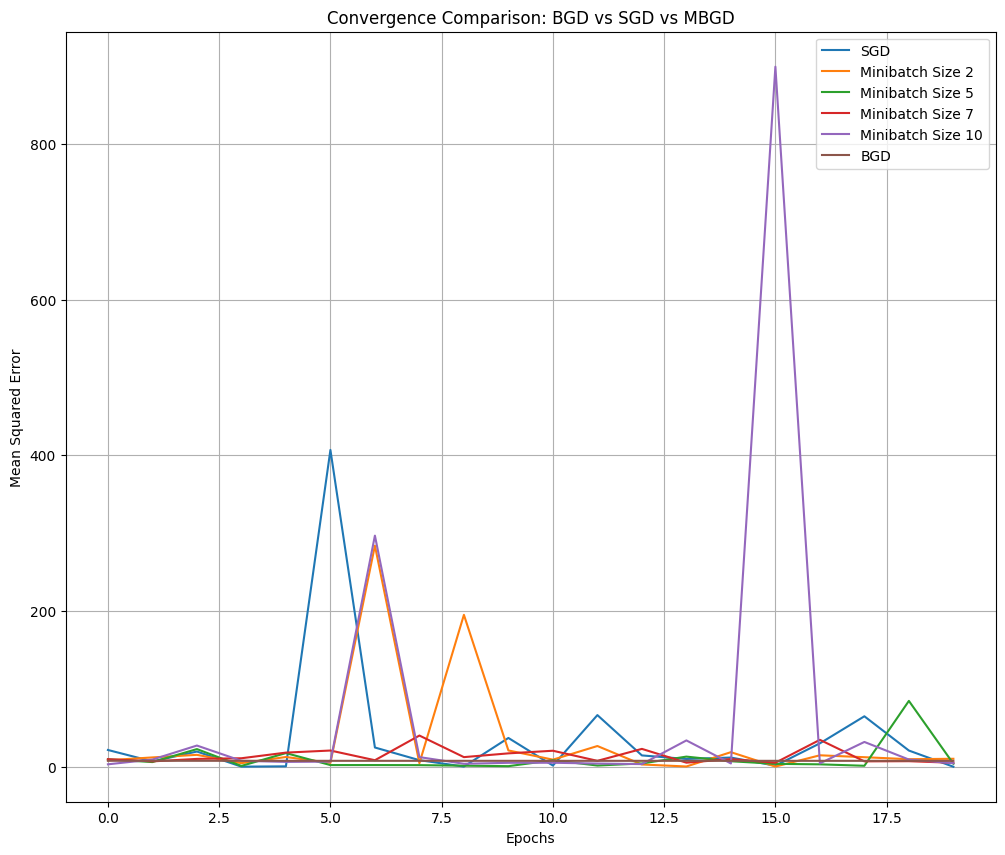

In [27]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error) 
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            mse = mean_squared_error(y_batch, y_pred)
            loss_history.append(mse)
                
        
        return loss_history


housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

batchsizes = [1, 2, 5, 7, 10, None] 
plt.figure(figsize=(12, 10))

for i in range(len(batchsizes)):
    n_batch = batchsizes[i]
    model = LinearRegression()
    loss_history = model.fit(X_train_scaled, y_train, batch_size = n_batch)

    if (n_batch == 1):
        plt.plot(loss_history, label='SGD')
    else:
        if (n_batch == None):
            plt.plot(loss_history, label='BGD')
        else:
            plt.plot(loss_history, label='Minibatch Size '+str(n_batch))

    mse = evaluate_model(model, X_test_scaled, y_test)
    print("Batch size #:", n_batch, " MSE:", mse)

#Visualization
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD vs MBGD')
plt.legend()
plt.grid(True)
plt.show()

The graph and the results show that the best performing gradient descent model is the Full Batch Gradient Descent compared to the others. For example the up and down nature for the SDG plot can indicate high sensitivity to individual data points leading it to converge slower and less smoothly. The mini-batch follows the same behavior. You can conclude that they trade stablilty for faster updates but are erratic in the process unlike BGD.